In [1]:
import pandas as pd

reading the csv data so as to load the data encoding:Using encoding="ISO-8859-1" helps read files with special characters. low_memory=False:forces Pandas to read the whole file at once, ensuring proper data type detection. df.head:displays the first five rows of a DataFrame by default.

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\archive\AviationData.csv", encoding="ISO-8859-1" ,low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


.shape:This returns the number of rows and columns in the dataset.

In [3]:
df.shape

(88889, 31)

df.info:provides a summary of the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

df.isna.sum:is used to count the number of missing (NaN) values in each column of a DataFrame.

In [5]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

after knowing the number of missing values that is when you know what techniques you will use to do data cleaning

df.describe: generates summary statistics for numerical columns in a DataFrame

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


df.duplicated:checks for duplicate rows in a DataFrame.

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [8]:
df.duplicated().sum()

np.int64(0)

np.int64(0):It means there are no duplicate rows in the DataFrame.

DATA CLEANING

Dropping columns with too many missing values

In [9]:
df = df.drop(columns=["FAR.Description", "Schedule", "Air.carrier"])


In [10]:
df['Location'] = df['Location'].replace('Unknown,', 'Unknown') #Replace 'Unknown,' with 'Unknown' in the Location column.
df['Airport.Name'] = df['Airport.Name'].replace(['UNK', 'UNK/NA', 'UNKNOWN', 'UNNAMED'], 'Unknown') #Replace 'Unknown' in the Airport Name column
df['Injury.Severity'] = df['Injury.Severity'].replace('Unavailable', 'Unknown') #Replace 'Unavailable' with 'Unknown' in the Injury Severity column.
df['Engine.Type'] = df['Engine.Type'].replace('UNK', 'Unknown') #Replace 'UNK' in Engine type column with 'Unknown'.
df['Weather.Condition'] = df['Weather.Condition'].replace('UNK', 'Unknown')  #Replace 'UNK' in Weather column with 'Unknown'.


Fill missing values

In [11]:
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(df["Total.Fatal.Injuries"].median())
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(df["Total.Serious.Injuries"].median())
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(df["Total.Minor.Injuries"].median())
df["Total.Uninjured"] = df["Total.Uninjured"].fillna(df["Total.Uninjured"].median())


In [12]:
df["Airport.Code"] = df["Airport.Code"].fillna("Missing")
df["Airport.Name"] = df["Airport.Name"].fillna("Missing")


In [13]:
df.isna().sum()##after dropping columns and rows just confirming whats remaining

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code                  0
Airport.Name                  0
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

In [14]:
df["Location"] = df["Location"].fillna("Missing")
df["Country"] = df["Country"].fillna("Missing")
df["Injury.Severity"] = df["Injury.Severity"].fillna("Missing")
df["Aircraft.damage"] = df["Aircraft.damage"].fillna("Missing")
df["Engine.Type"] = df["Engine.Type"].fillna("Missing")
df["Purpose.of.flight"] = df["Purpose.of.flight"].fillna("Missing")
df["Report.Status"] = df["Report.Status"].fillna("Missing")
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna("Missing")


In [15]:
df.dropna(subset =['Latitude'],inplace=True)
df.dropna(subset =['Longitude'],inplace=True)
df.dropna(subset=['Publication.Date'],inplace=True)
          

In [16]:
df["Aircraft.Category"] = df["Aircraft.Category"].fillna("Missing")
df["Registration.Number"] = df["Registration.Number"].fillna("Missing")
df["Make"] = df["Make"].fillna("Missing")
df["Model"] = df["Model"].fillna("Missing")
df["Amateur.Built"] = df["Amateur.Built"].fillna("Missing")
df["Number.of.Engines"] = df["Number.of.Engines"].fillna(df["Number.of.Engines"].median())
df["Weather.Condition"] = df["Weather.Condition"].fillna("Missing")


In [17]:
df.isna().sum()##the data is now cleaned using .fill and .drop in different rows and columns

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [18]:
df.info()##the final output after cleaning the data

<class 'pandas.core.frame.DataFrame'>
Index: 33762 entries, 2 to 88886
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                33762 non-null  object 
 1   Investigation.Type      33762 non-null  object 
 2   Accident.Number         33762 non-null  object 
 3   Event.Date              33762 non-null  object 
 4   Location                33762 non-null  object 
 5   Country                 33762 non-null  object 
 6   Latitude                33762 non-null  object 
 7   Longitude               33762 non-null  object 
 8   Airport.Code            33762 non-null  object 
 9   Airport.Name            33762 non-null  object 
 10  Injury.Severity         33762 non-null  object 
 11  Aircraft.damage         33762 non-null  object 
 12  Aircraft.Category       33762 non-null  object 
 13  Registration.Number     33762 non-null  object 
 14  Make                    33762 non-null  obj

In [19]:
print(df.columns)##total number of columns in your dataframe


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')


In [20]:
df.shape ##shows the rows and columns reamining after data cleaning


(33762, 28)

This shows that we have 28 columns remaining after we dropped 3columns and multiple rows to make it easier for us to do visualization in our data

In [21]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Missing,Missing,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Missing,Missing,...,Turbo Fan,Missing,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Reciprocating,Unknown,1.0,0.0,0.0,1.0,IMC,Landing,Probable Cause,30-04-2008
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,Missing,Missing,...,Reciprocating,Personal,2.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,28-03-2006
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,Missing,Missing,...,Reciprocating,Personal,2.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,23-07-2003


In [22]:
df.to_csv("cleaned_data2.csv", index=False)#saving your cleaned data so that you can be able to use it for visualizations eg in tableau.


AGGREGATION

In [23]:
df.groupby("Location")["Total.Fatal.Injuries"].sum()

Location
,                       1.0
, AO                    2.0
ABERDEEN, SD            0.0
ABILENE, KS             0.0
ABILENE, TX             0.0
                       ... 
Zurich, Eswatini        2.0
Zurich, Switzerland     0.0
Zuzenhausen, Germany    1.0
Zwingle, IA             0.0
helena, MT              0.0
Name: Total.Fatal.Injuries, Length: 14196, dtype: float64

With this by using groupby you can compare the location against total fatal injuries

In [24]:
df.groupby("Airport.Name")["Total.Minor.Injuries"].sum()

Airport.Name
(Pvt) Gibbons Flying Service    0.0
(private)                       1.0
---                             0.0
12E Airstrip                    1.0
29 Palms Airport                0.0
                               ... 
private airstrip                2.0
private dirt airstrip           0.0
private grass strip             0.0
shiocton                        1.0
Évora Airport                   0.0
Name: Total.Minor.Injuries, Length: 12198, dtype: float64

With this you can be able to see the airport name and the total injuries the aiport has had

VISUALIZATION

In [25]:
import matplotlib.pyplot as plt

Accident Severity by Aircraft Model (Stacked Bar Chart)

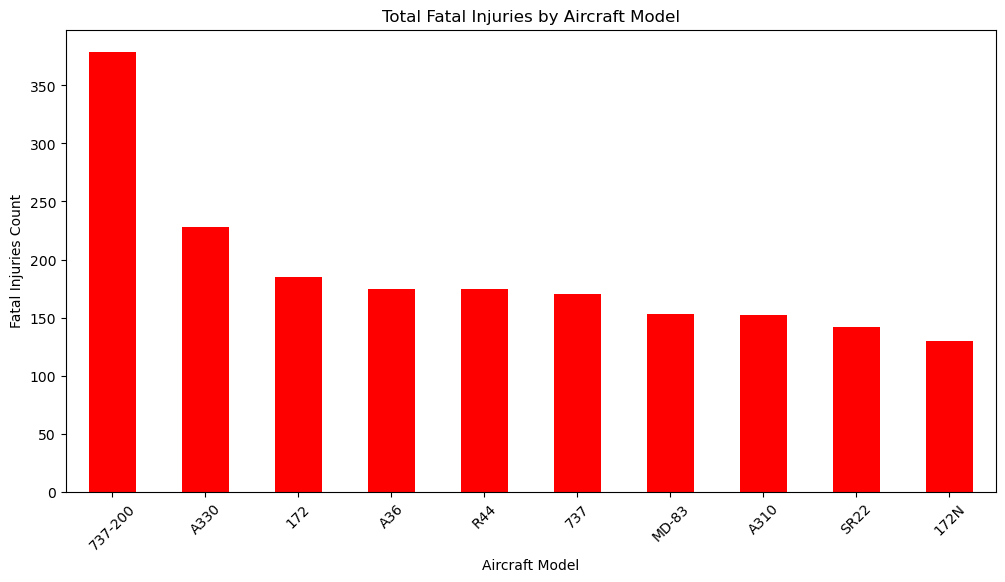

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.groupby("Model")["Total.Fatal.Injuries"].sum().nlargest(10).plot(kind="bar", color="red")
plt.title("Total Fatal Injuries by Aircraft Model")
plt.xlabel("Aircraft Model")
plt.ylabel("Fatal Injuries Count")
plt.xticks(rotation=45)

# Save the figure before displaying it
plt.savefig("fatal_injuries_by_aircraft_model.png", dpi=300, bbox_inches='tight')
# Display the plot
plt.show()



Accidents by Engine Type (Bar Chart)


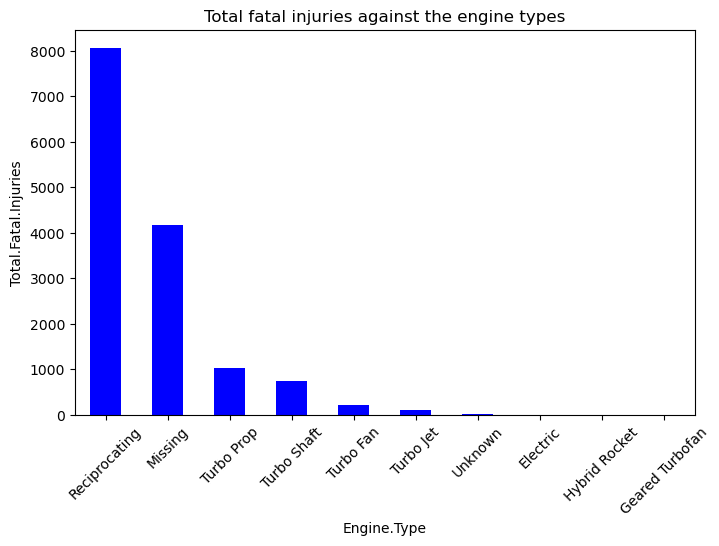

In [27]:
plt.figure(figsize=(8, 5))
df.groupby("Engine.Type")["Total.Fatal.Injuries"].sum().nlargest(10).plot(kind="bar", color="blue")
plt.title("Total fatal injuries against the engine types")
plt.xlabel("Engine.Type")
plt.ylabel("Total.Fatal.Injuries")
plt.xticks(rotation=45)
plt.savefig("accidents_by_engine_type_model.png", dpi=300, bbox_inches='tight')
plt.show()


Accidents by Purpose of Flight (Bar Chart)

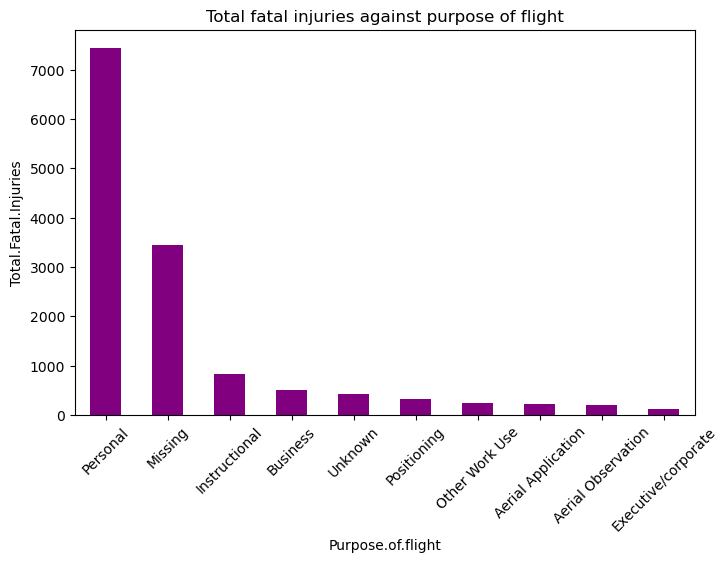

In [28]:
plt.figure(figsize=(8, 5))
df.groupby("Purpose.of.flight")["Total.Fatal.Injuries"].sum().nlargest(10).plot(kind="bar", color="purple")
plt.title("Total fatal injuries against purpose of flight")
plt.xlabel("Purpose.of.flight")
plt.ylabel("Total.Fatal.Injuries")
plt.xticks(rotation=45)
plt.savefig("accidents_by_engine_type_model.png", dpi=300, bbox_inches='tight')
plt.show()


Accidents by Flight Phase (Bar Chart)

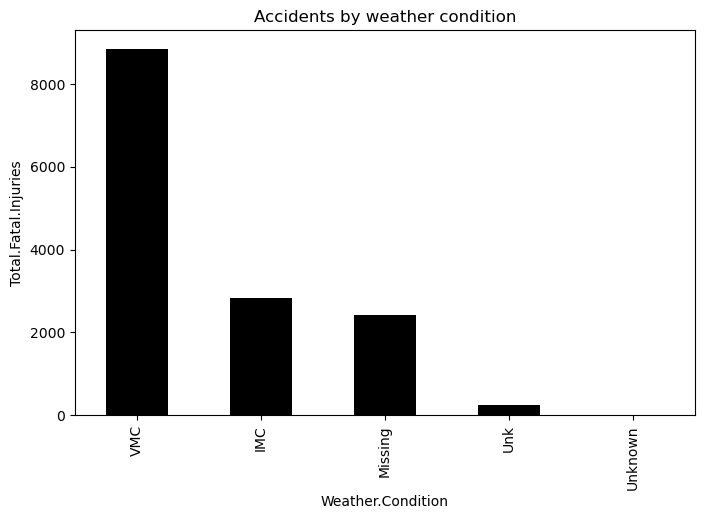

In [96]:
plt.figure(figsize=(8, 5))
df.groupby("Weather.Condition")["Total.Fatal.Injuries"].sum().nlargest(10).plot(kind="bar", color="black")
plt.title("Accidents by weather condition")
plt.xlabel("Weather.Condition")
plt.ylabel("Total.Fatal.Injuries")
plt.show()


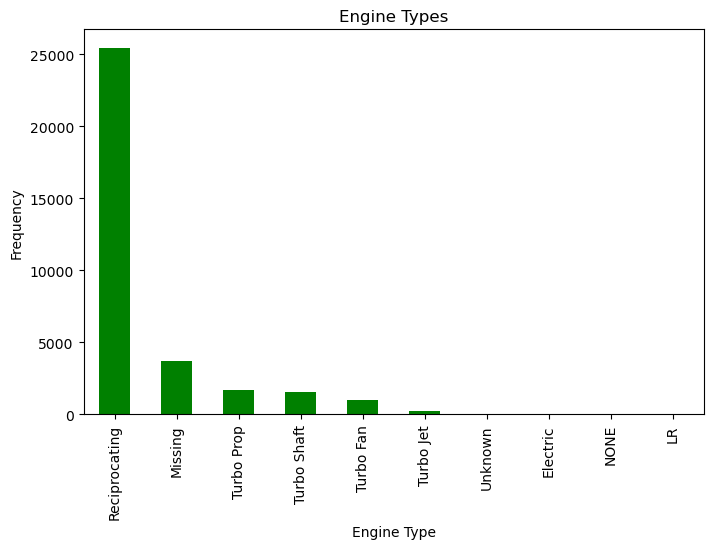

In [97]:
plt.figure(figsize=(8, 5))
df["Engine.Type"].value_counts().nlargest(10).plot(kind="bar", color="green")
plt.title("Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Frequency")
plt.show()